In [1]:
import os
import json
import time
import numpy as np
import pandas as pd
import igraph as ig
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Literal

Snapnums = Literal["000", "001", "002", "003", "004"]

graphs_root: str = './quijote/grafos'  # Cambiar si es necesario
metrics_path: str = f'{graphs_root}/metrics.json'

assert os.path.exists(metrics_path)

with open(metrics_path) as json_data:
    data: dict = json.load(json_data)

In [5]:
# Convertir toda la información de las métricas en algo más legible
simus_col: list[str] = []
realizations_col: list[str] = []
snapnums_col: list[str] = []
global_efficiency_col: list[float] = []
local_efficiencies_col: list[list[float]] = []
avg_local_efficiencies_col: list[float] = []
entropy_col: list[float] = []
hurst_col: list[float] = []
closeness_col: list[list[float]] = []
betweenness_col: list[list[float]] = []
eigenvector_col: list[list[float]] = []
convergence_col: list[list[float]] = []
n_nodes: list[int] = []

t0 = time.perf_counter()

for simu, realizations in data.items():
    print(simu)
    
    if simu != 'randoms':
        for realization, snapnums in realizations.items():
            for snapnum, metrics in snapnums.items():
                # Tomar una variable  que siempre está y en base a ella decidir si están las métricas completas o no
                if "entropy" not in metrics:
                    continue

                g = ig.Graph.Read_GraphML(f'{graphs_root}/{simu}/{realization}/{simu}_{snapnum}.graphml.xml')

                simus_col.append(simu)
                realizations_col.append(realization)
                snapnums_col.append(snapnum)
                if "global_efficiency" in metrics:
                    global_efficiency_col.append(metrics["global_efficiency"])
                else:
                    global_efficiency_col.append(0.0)
                local_efficiencies_col.append(metrics["local_efficiencies"])
                avg_local_efficiencies_col.append(metrics["avg_local_efficiency"])
                entropy_col.append(metrics["entropy"])
                hurst_col.append(metrics["hurst"])
                closeness_col.append(metrics["closeness"])
                betweenness_col.append(metrics["betweenness"])
                eigenvector_col.append(metrics["eigenvector"])
                convergence_col.append(metrics["convergence"])
                n_nodes.append(len(g.vs))
    else:
        for snapnum, metrics in data[simu].items():
            g = ig.Graph.Read_GraphML(f'{graphs_root}/{simu}/random_{snapnum}.graphml.xml')

            simus_col.append(simu)
            realizations_col.append("0")
            snapnums_col.append(snapnum)
            if "global_efficiency" in metrics:
                global_efficiency_col.append(metrics["global_efficiency"])
            else:
                global_efficiency_col.append(0.0)
            local_efficiencies_col.append(metrics["local_efficiencies"])
            avg_local_efficiencies_col.append(metrics["avg_local_efficiency"])
            entropy_col.append(metrics["entropy"])
            hurst_col.append(metrics["hurst"])
            closeness_col.append(metrics["closeness"])
            betweenness_col.append(metrics["betweenness"])
            eigenvector_col.append(metrics["eigenvector"])
            convergence_col.append(metrics["convergence"])
            n_nodes.append(len(g.vs))

print(f'\nTiempo total: {time.perf_counter() - t0} segundos')

h_m
DC_m
DC_p
fiducial
randoms
Mnu_p
Mnu_ppp
Mnu_pp
s8_m
s8_p
fiducial_LR
fiducial_HR
fiducial_ZA
w_m
w_p

Tiempo total: 25.482728831000713 segundos


In [6]:
df: pd.DataFrame = pd.DataFrame({
    "simulation": simus_col,
    "realization": realizations_col,
    "snapnum": snapnums_col,
    "nodes": n_nodes,
    "global_efficiency": global_efficiency_col,
    "local_efficiencies": local_efficiencies_col,
    "avg_local_efficiencies": avg_local_efficiencies_col,
    "entropy": entropy_col,
    "hurst": hurst_col,
    "closeness": closeness_col,
    "betweenness": betweenness_col,
    "eigenvector": eigenvector_col,
    "convergence": convergence_col
})

In [7]:
# Obtener nuevas métricas globales a partir de las listas
for local_metric_str in ['closeness', 'betweenness',
                     'eigenvector', 'convergence']:
    local_metric = df[local_metric_str].tolist()
    avgs = [np.mean(local) for local in local_metric]
    df[f'avg_{local_metric_str}'] = avgs

In [52]:
df[df["simulation"] == "randoms"]["snapnum"].unique()

array(['000'], dtype=object)

In [9]:
global_metrics: list[str] = [
    "global_efficiency", "avg_local_efficiencies",
    "entropy", "hurst", "avg_closeness", "avg_betweenness", 
    "avg_eigenvector", "avg_convergence"
]

# Normalizar
normalized_df = df.copy()
for global_metric in global_metrics:
    normalized_df[global_metric] /= normalized_df["nodes"]

In [7]:
normalized_df

,simulation,realization,snapnum,nodes,global_efficiency,local_efficiencies,avg_local_efficiencies,entropy,hurst,closeness,betweenness,eigenvector,convergence,avg_closeness,avg_betweenness,avg_eigenvector,avg_convergence
0,h_m,101,000,4717,0.000036,"[0.6321428571428569, 0.675, 0.6557734204793026...",0.000148,0.001785,0.000104,"[0.0017965096857643719, 0.0011612027784065183,...","[130712.0, 2187.0, 27464.0, 7766.0, 7550.0, 48...","[3.6589114179022966e-07, 0.002452992681506109,...","[0.6165960024227741, 0.6949253731343283, 0.327...",3.026152e-07,4.391130,5.712061e-07,0.000115
1,h_m,101,001,42999,0.000000,"[0.7197802197802198, 0.7666666666666667, 0.703...",0.000016,0.000247,0.000012,"[0.001318497209475962, 0.0015031817608753273, ...","[440593.0, 101676.0, 45321.0, 273106.0, 67880....","[1.9382343436521035e-09, 1.7342312928906623e-0...","[0.7582226762002043, 0.9978176934698674, 0.654...",3.319761e-08,9.320822,5.564601e-09,0.000016
2,h_m,10,000,4665,0.000036,"[0.6601307189542481, 0.7888888888888889, 0.751...",0.000150,0.001802,0.000111,"[0.001355045358612164, 0.001343512920109291, 0...","[9735.0, 5022.0, 48778.0, 52205.0, 25796.0, 30...","[0.0007515010670393662, 0.0019349976754350511,...","[0.8409884501745903, 0.7777777777777778, 0.057...",3.055521e-07,4.397936,5.772182e-07,0.000115
3,h_m,10,001,42659,0.000000,"[0.7272727272727273, 0.7234432234432235, 0.700...",0.000016,0.000249,0.000012,"[0.0015095993415628868, 0.00124795205734622, 0...","[602608.0, 17700.0, 173192.0, 26444.0, 88969.0...","[7.899082034407834e-13, 8.658450335801845e-06,...","[0.23466438282839097, 0.0554315115037375, 0.53...",3.362751e-08,9.323972,5.231571e-09,0.000015
4,h_m,1,000,4612,0.000037,"[0.7916666666666666, 0.6556372549019607, 0.675...",0.000151,0.001821,0.000105,"[0.001282839274378569, 0.0014041920301318131, ...","[1107.0, 13235.0, 1148.0, 31714.0, 17121.0, 69...","[2.6369605509129264e-05, 0.0004009996185762696...","[0.9981296758104738, 0.9962335216572504, 0.996...",3.075696e-07,4.396237,4.782990e-07,0.000115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,s8_p,1,000,5836,0.000027,"[0.6831501831501832, 0.8055555555555556, 0.684...",0.000119,0.001479,0.000082,"[0.0012896002042594977, 0.0013881123466369728,...","[13092.0, 4791.0, 9385.0, 16745.0, 5306.0, 414...","[0.00034301433364351206, 0.000309895983215718,...","[0.7373650107991361, 0.011282051282051283, 0.9...",2.428239e-07,4.776587,4.148067e-07,0.000093
128,s8_p,101,000,5998,0.000027,"[0.8333333333333334, 0.6752450980392155, 0.760...",0.000116,0.001444,0.000092,"[0.0011643886765124987, 0.0012192797776034228,...","[717.0, 10209.0, 10138.0, 8962.0, 896.0, 71332...","[0.0013997504150172094, 0.00019898327151131147...","[0.8809523809523809, 0.9944071588366891, 0.925...",2.383600e-07,4.779865,3.281063e-07,0.000093
129,s8_p,103,000,6096,0.000026,"[0.7032967032967034, 0.656862745098039, 0.7370...",0.000114,0.001423,0.000085,"[0.0014005760509703154, 0.001491121532007737, ...","[12861.0, 47243.0, 23269.0, 6258.0, 5485.0, 72...","[9.375688857529681e-07, 0.000299454603694843, ...","[0.797877716018191, 0.9732620320855615, 0.3578...",2.330336e-07,4.817547,2.087882e-07,0.000092
130,s8_p,106,000,5866,0.000027,"[0.8, 0.7870370370370371, 0.6904761904761905, ...",0.000119,0.001472,0.000092,"[0.001365786799080098, 0.0016437518356814354, ...","[2755.0, 11624.0, 114447.0, 37117.0, 1639.0, 7...","[6.073970459847066e-05, 1.2168365880920925e-06...","[0.9326666666666666, 0.9801488833746899, 0.902...",2.429095e-07,4.746568,4.056609e-07,0.000094


## Gráficas

### Histogramas de las métricas locales

In [18]:
def to_flattenarray(df: pd.DataFrame, simulation: str, snapnum: Snapnums, metric_label: str) -> list[float]:
    subdf: pd.DataFrame = df.loc[(df["simulation"] == simulation) &
                                 (df["snapnum"] == snapnum)].reset_index()
    metric: pd.Series = subdf[metric_label]

    if type(metric[0]) != list:
        raise ValueError(f"La métrica {metric_label} no es local!")
    
    flatten_array: list[float] = []
    for sub_list in metric:
        flatten_array.extend(sub_list)

    return flatten_array


#### `snapnums`

In [19]:
def plot_local_metric(df: pd.DataFrame, snapnum: Snapnums, metric_label: str, ax) -> None:
    simulations_col = list(df["simulation"].unique())
    arrays = [to_flattenarray(df, simulation, snapnum, metric_label)
              for simulation in simulations_col]

    for i, simu in enumerate(simulations_col):
        if metric_label == 'eigenvector':
            arrays[i] = list(filter(lambda x: x > 1e-3, arrays[i]))

        subdf = pd.DataFrame({"data": arrays[i]})
        sns.histplot(subdf, x='data', stat='density', log_scale=True,
                     kde=True, label=simu, ax=ax)
        
    ax.set(title=metric_label, xlabel=None, ylabel=None)
    ax.legend(title="Simulation")
    

def plot_local_metrics(snapnum: Snapnums) -> None:
    fig, axes = plt.subplots(3, 2, figsize=(16, 9))

    gs = axes[2, 0].get_gridspec()
    for ax in axes[2, :]:
        ax.remove()

    axbig = fig.add_subplot(gs[2, :])

    plot_local_metric(df, snapnum, "local_efficiencies", axes[0, 0])
    plot_local_metric(df, snapnum, "closeness", axes[0, 1])
    plot_local_metric(df, snapnum, "betweenness", axes[1, 0])
    plot_local_metric(df, snapnum, "convergence", axes[1, 1])
    plot_local_metric(df, snapnum, "eigenvector", axbig)

    fig.suptitle(f'Histogramas para $snapnum = {snapnum}$')

    fig.tight_layout()
    plt.show()

/home/juand/Documents/vscode/delaunay/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/juand/Documents/vscode/delaunay/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/juand/Documents/vscode/delaunay/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/juand/Documents/vscode/delaunay/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/juand/Documents/vscode/delaunay/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


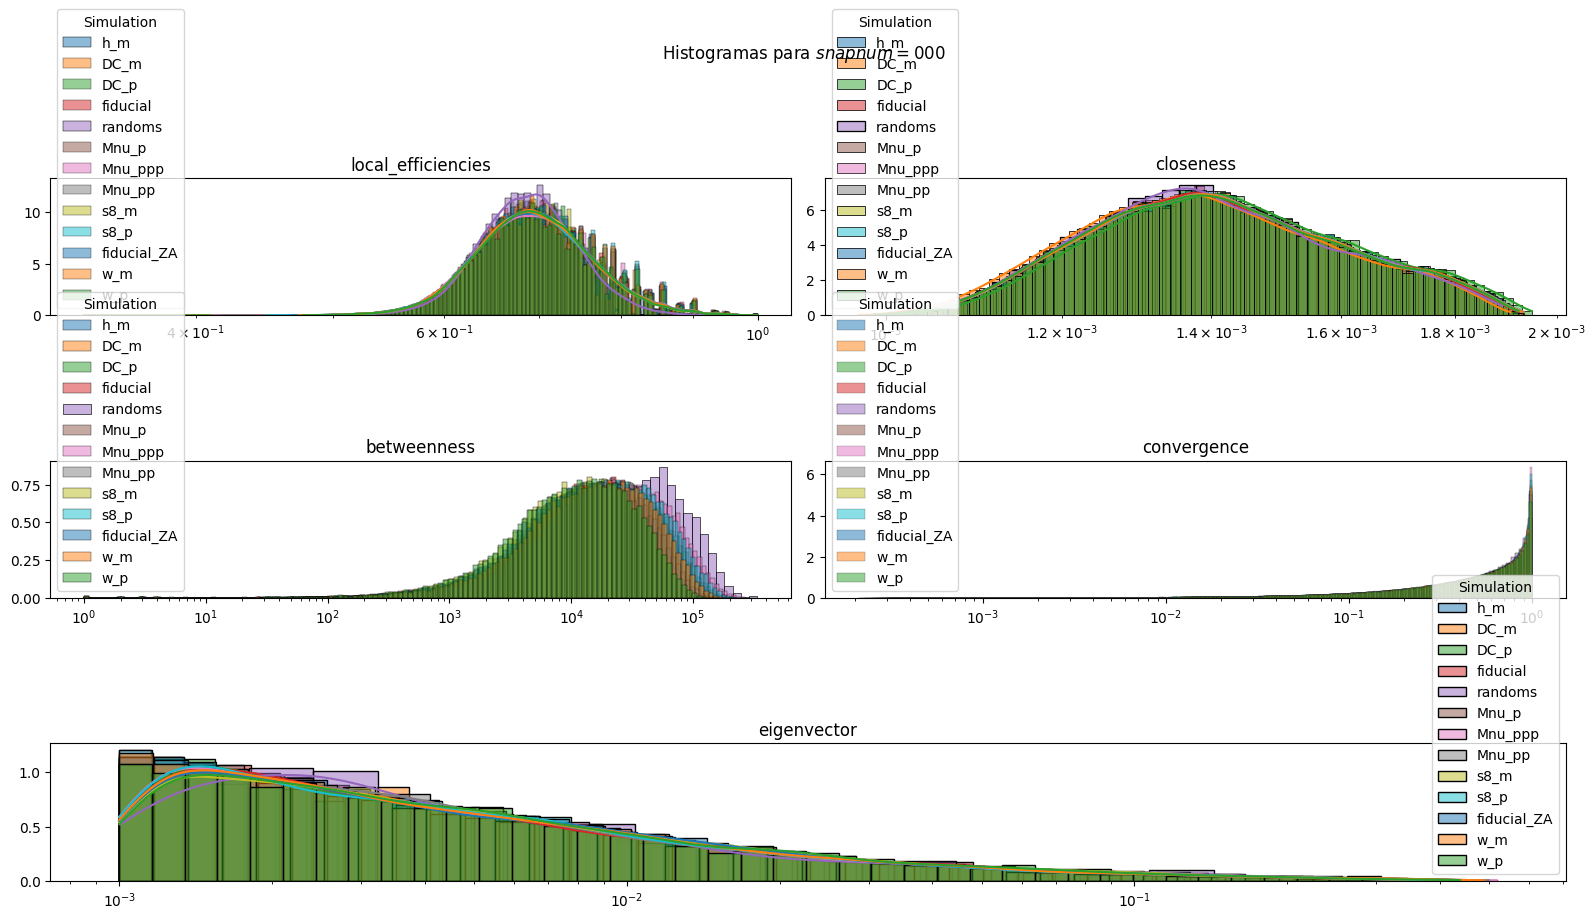

In [20]:
plot_local_metrics("000")

In [21]:
# NO EJECUTAR! Se demora 1000 siglos y finalmente no hace nada. Así que no vale la pena
# plot_local_metrics("001")

### Boxplots & Violinplots de las métricas globales

#### Sin normalizar

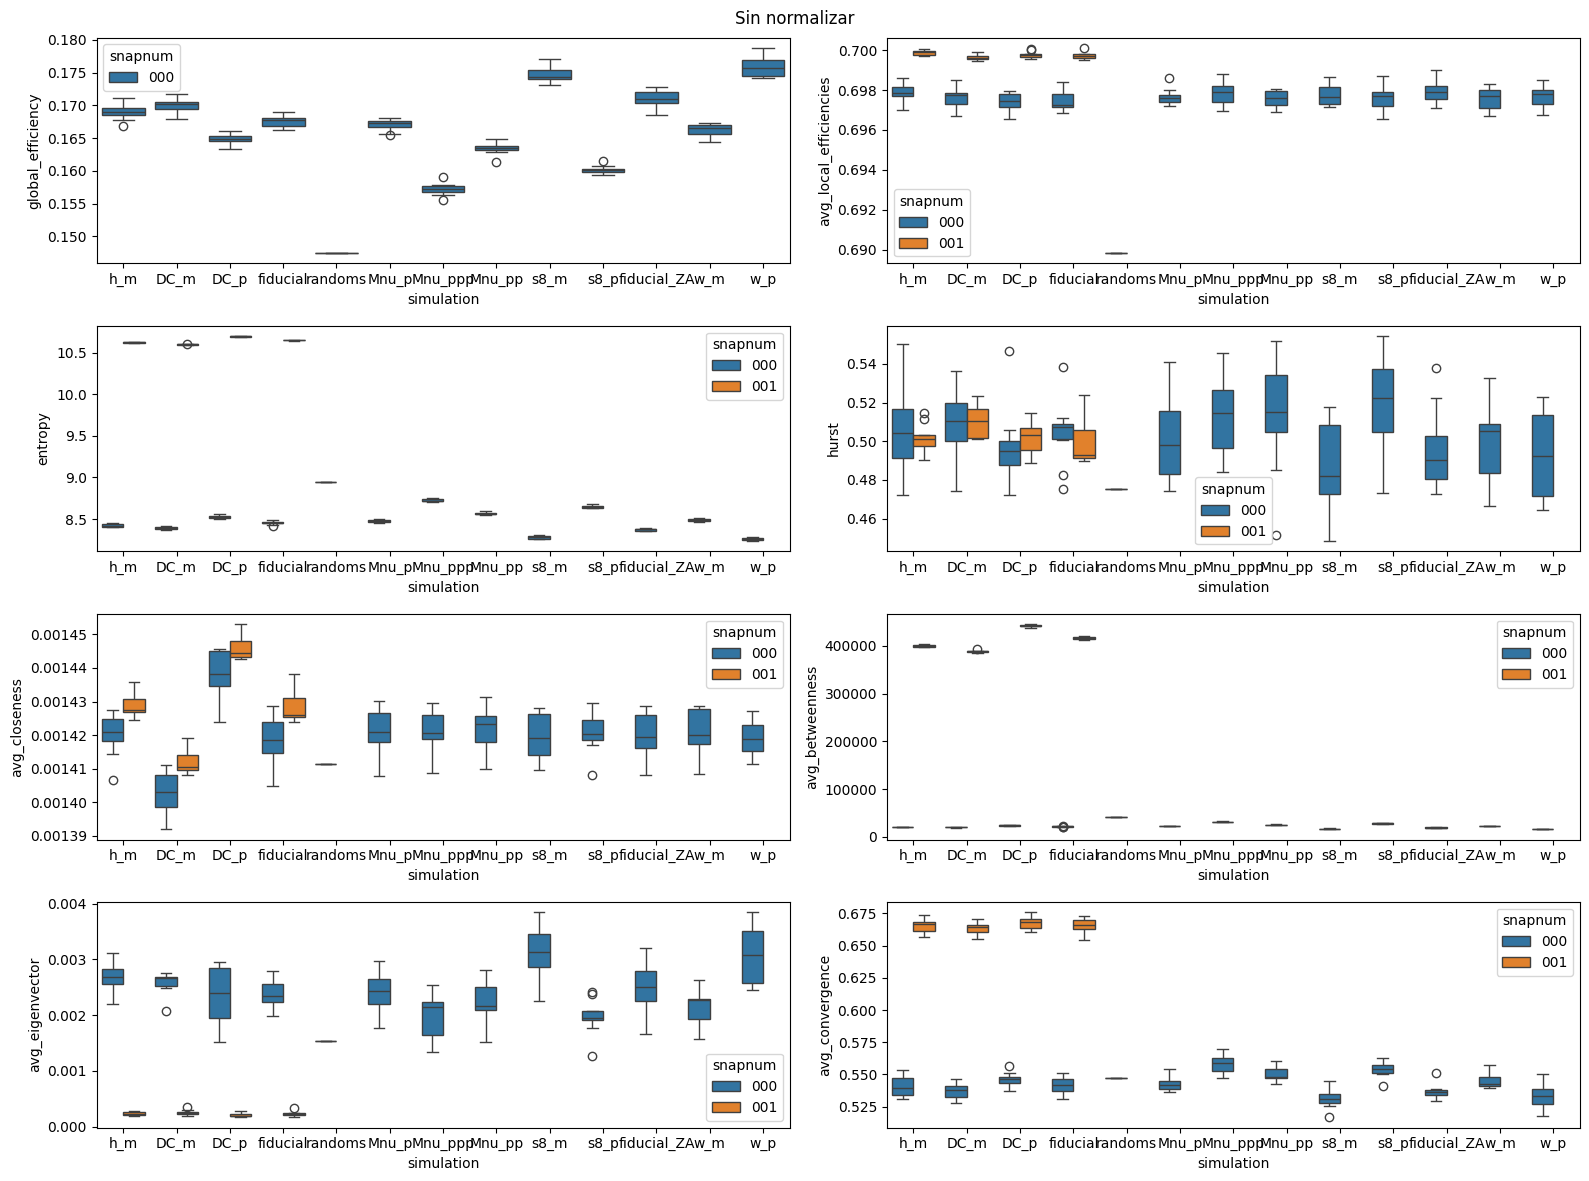

In [22]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(16, 12))

for metric, ax in zip(global_metrics, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)):
    if metric != "global_efficiency":
        sns.boxplot(df, x='simulation', y=metric, hue='snapnum', ax=ax)
    else:
        sns.boxplot(df[df["snapnum"] == "000"], x='simulation', y=metric, hue='snapnum', ax=ax)

fig.suptitle('Sin normalizar')
fig.tight_layout()
plt.show()

/tmp/ipykernel_16712/297893349.py:7: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.violinplot(df[df["snapnum"] == "000"], x='simulation', y=metric, hue='snapnum', inner='quart', palette=sns.cubehelix_palette(start=2), ax=ax)
/tmp/ipykernel_16712/297893349.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.violinplot(df, x='simulation', y=metric, hue='snapnum', inner='quart', palette=sns.cubehelix_palette(start=2), ax=ax)
/tmp/ipykernel_16712/297893349.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.violinplot(df, x='simulation', y=metric, hue='snapnum', inner='quart', palette=sns.cubehelix_palette(start=2), ax=ax)
/tmp/ipykernel_16712/297893349.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.violinplot(df, x='simulation', y=metric, hue='snapnum', inner='quart', pal

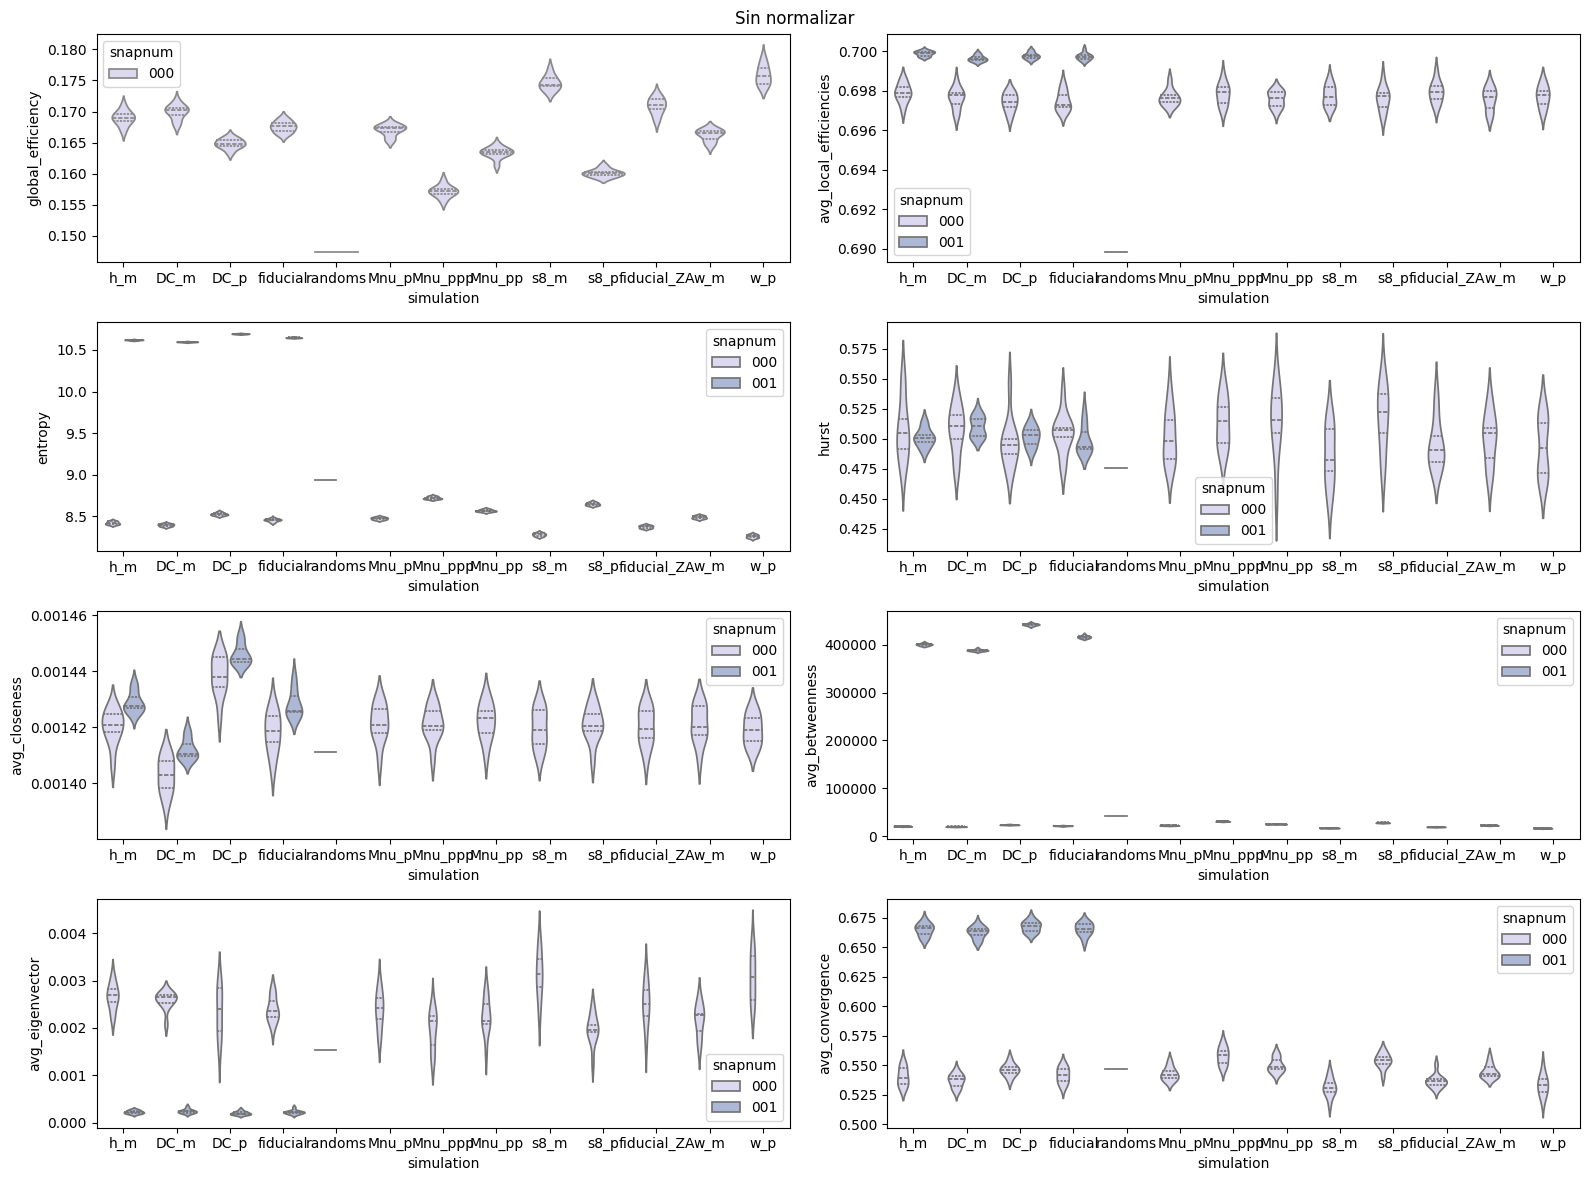

In [23]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(16, 12))

for metric, ax in zip(global_metrics, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)):
    if metric != "global_efficiency":
        sns.violinplot(df, x='simulation', y=metric, hue='snapnum', inner='quart', palette=sns.cubehelix_palette(start=2), ax=ax)
    else:
        sns.violinplot(df[df["snapnum"] == "000"], x='simulation', y=metric, hue='snapnum', inner='quart', palette=sns.cubehelix_palette(start=2), ax=ax)

fig.suptitle('Sin normalizar')
fig.tight_layout()
plt.show()

#### Normalizar

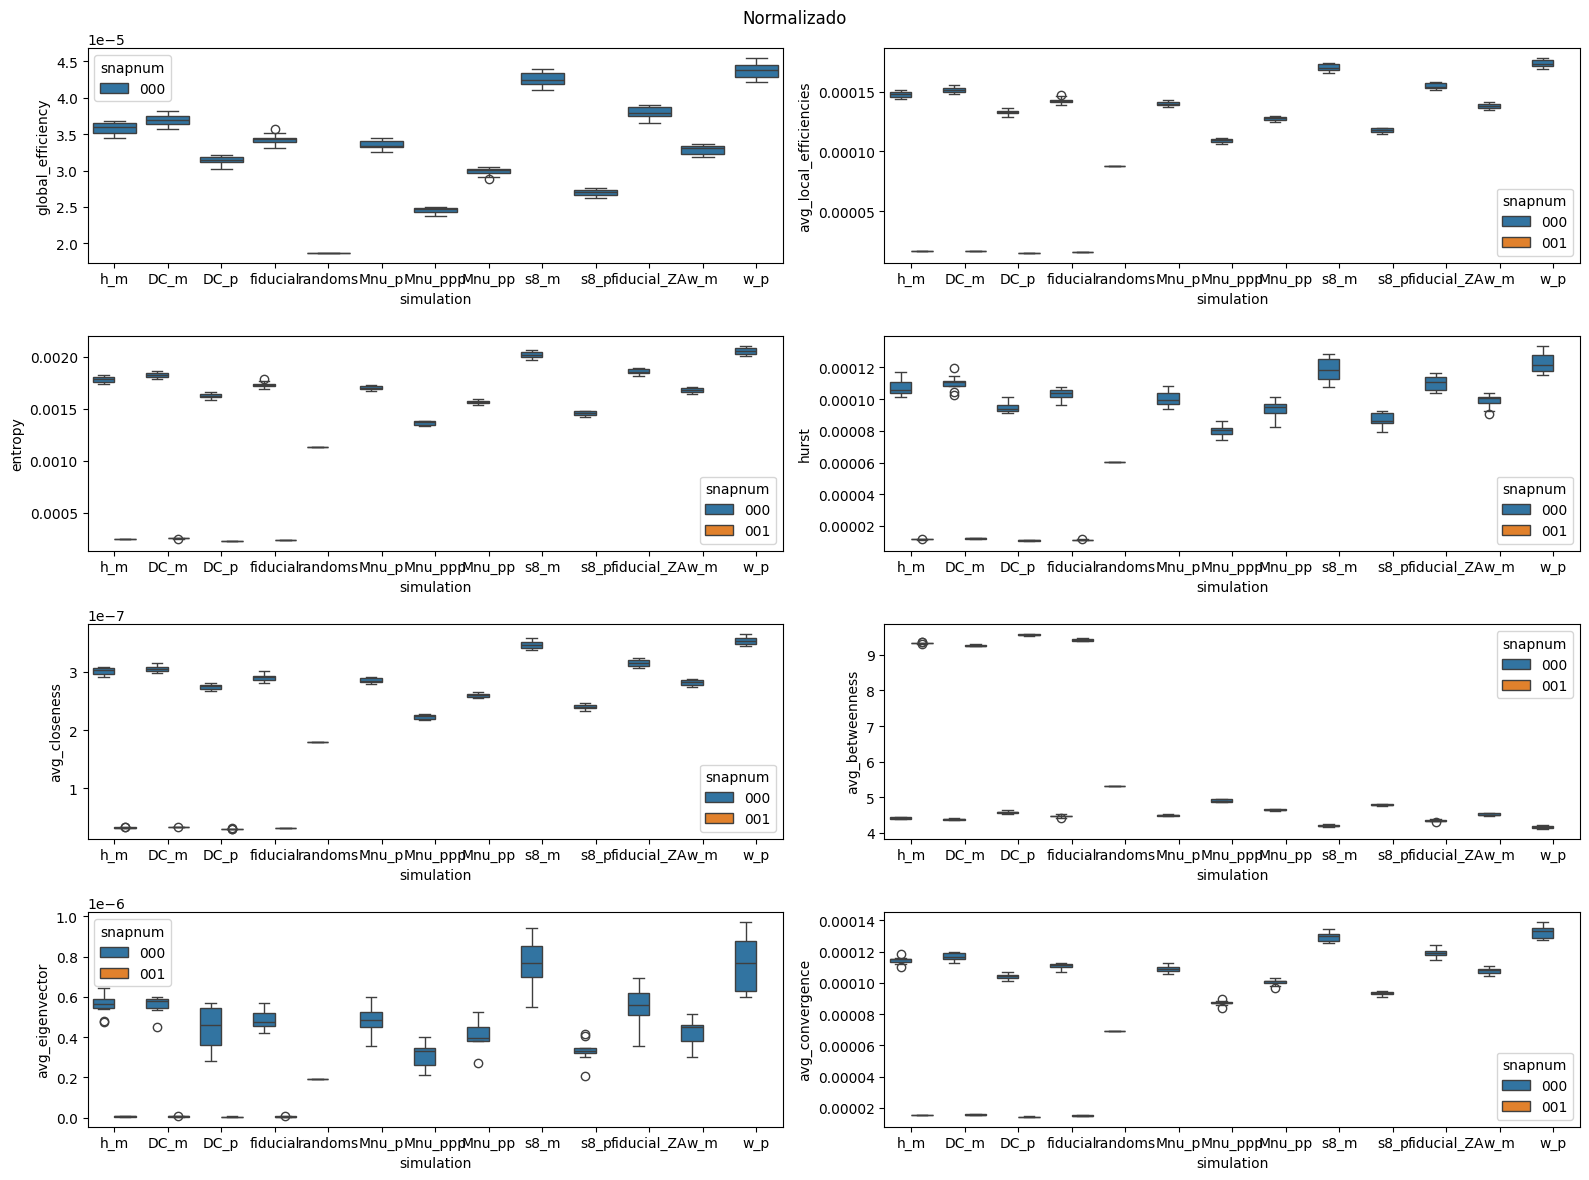

In [24]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(16, 12))

for metric, ax in zip(global_metrics, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)):
    if metric != "global_efficiency":
        sns.boxplot(normalized_df, x='simulation',
                    y=metric, hue='snapnum', ax=ax)
    else:
        sns.boxplot(normalized_df[normalized_df["snapnum"] == "000"],
                    x='simulation', y=metric, hue='snapnum', ax=ax)

fig.suptitle('Normalizado')
fig.tight_layout()
plt.show()

/tmp/ipykernel_16712/2792159413.py:8: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.violinplot(normalized_df[normalized_df["snapnum"] == "000"],
/tmp/ipykernel_16712/2792159413.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.violinplot(normalized_df, x='simulation', y=metric,
/tmp/ipykernel_16712/2792159413.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.violinplot(normalized_df, x='simulation', y=metric,
/tmp/ipykernel_16712/2792159413.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.violinplot(normalized_df, x='simulation', y=metric,
/tmp/ipykernel_16712/2792159413.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.violinplot(normalized_df, x='simulation', y=metric,
/tmp/ipykernel_16712/2792159413.py:5: Use

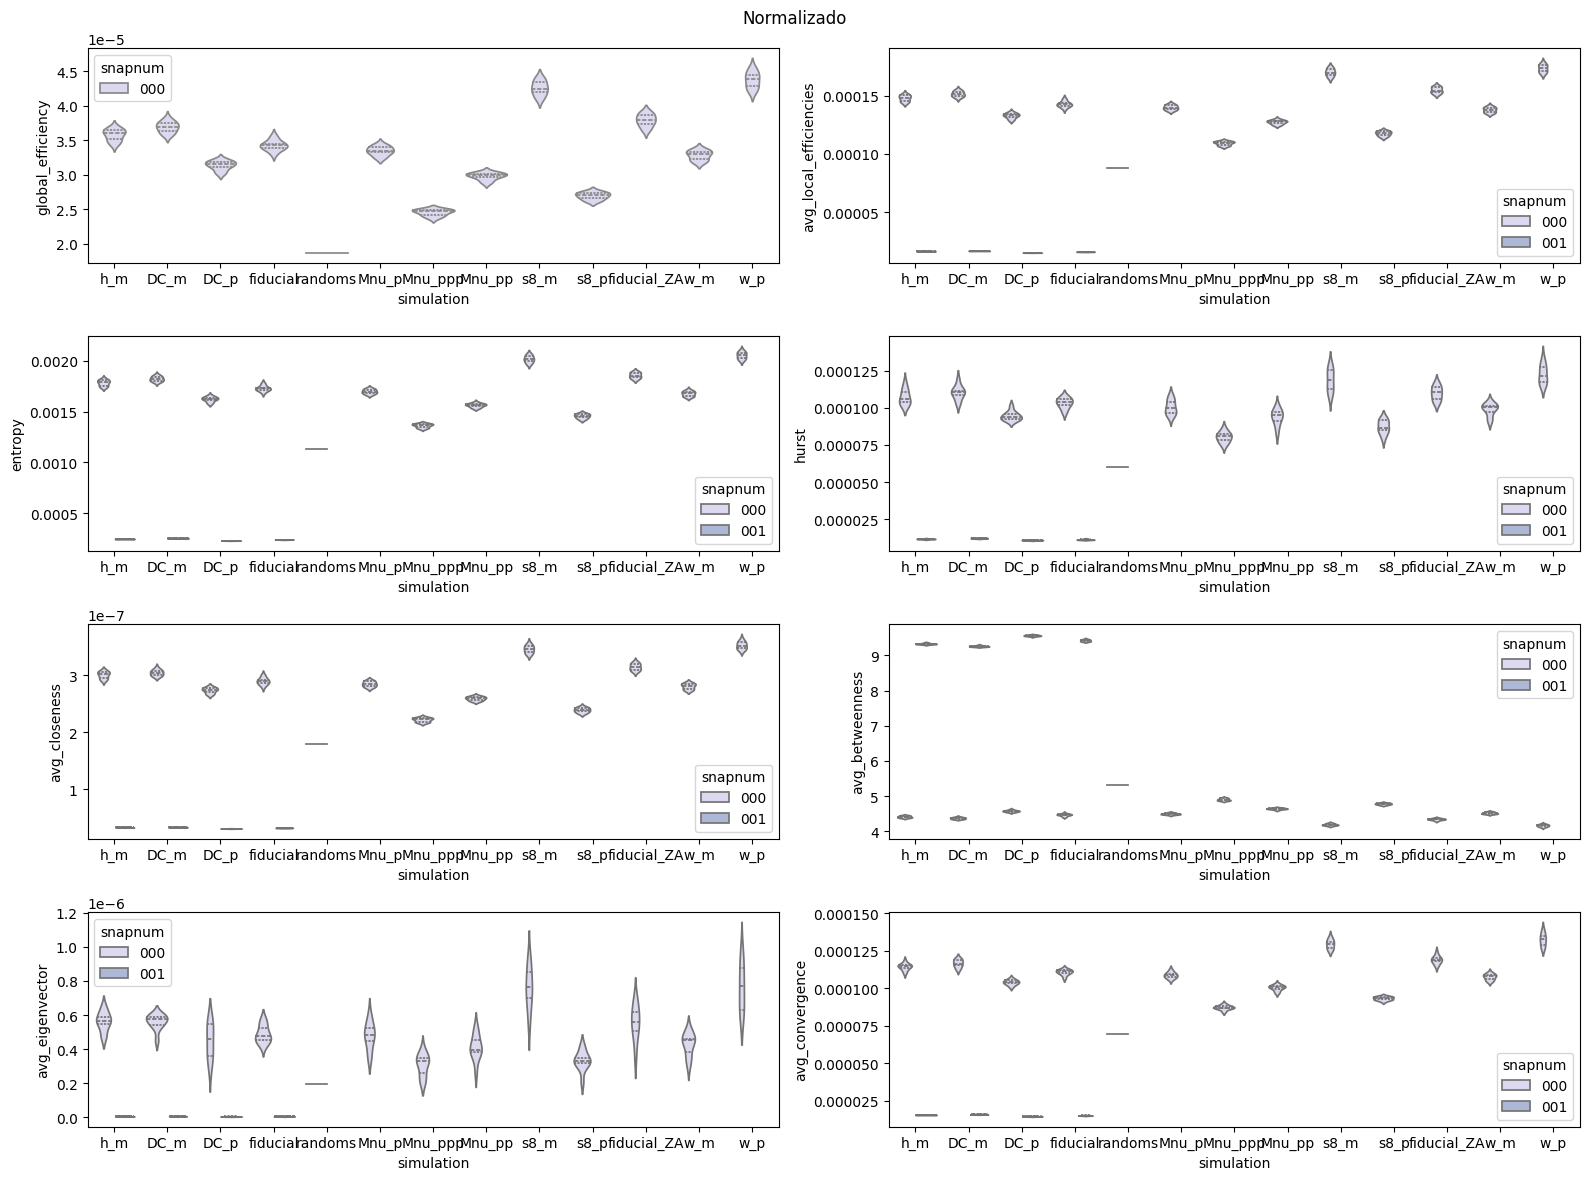

In [25]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(16, 12))

for metric, ax in zip(global_metrics, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)):
    if metric != "global_efficiency":
        sns.violinplot(normalized_df, x='simulation', y=metric,
                       hue='snapnum', inner='quart', palette=sns.cubehelix_palette(start=2), ax=ax)
    else:
        sns.violinplot(normalized_df[normalized_df["snapnum"] == "000"],
                       x='simulation', y=metric, hue='snapnum', inner='quart', palette=sns.cubehelix_palette(start=2), ax=ax)

fig.suptitle('Normalizado')
fig.tight_layout()
plt.show()

# Comparación con los aleatorios

In [48]:
def comparate_randoms(df: pd.DataFrame, snapnum: Snapnums, func: callable = None) -> pd.DataFrame:
    if func is None:
        func = lambda dd, rr: dd/rr

    cols = ["simulation", "realization", *global_metrics]
    randoms = df.loc[(df["simulation"] == "randoms") &
                     (df["snapnum"] == snapnum)].reset_index()
    sub_df = df.loc[(df["snapnum"] == snapnum) &
                    (df["simulation"] != "randoms")].reset_index()

    sub_df = sub_df[cols]
    randoms = randoms[cols]

    ratio_df = pd.DataFrame(columns=cols)

    for i in range(len(sub_df)):
        data = list(func(sub_df.loc[i, global_metrics], randoms.loc[0, global_metrics]))
        ratio_df.loc[i] = [*list(sub_df.loc[i, cols[:2]]), *data]

    return ratio_df


def plot_ratio(df: pd.DataFrame, snapnum: Snapnums, func: callable = None, title: str = '') -> None:
    ratio = comparate_randoms(df, snapnum, func)
    display(ratio)
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(16, 12))

    if snapnum == "000":
        sns.boxplot(ratio, y='global_efficiency', x='simulation', ax=ax1)

    for metric, ax in zip(global_metrics[1:], (ax2, ax3, ax4, ax5, ax6, ax7, ax8)):
        sns.boxplot(ratio, y=metric, x='simulation', ax=ax)

    fig.suptitle(title)
    fig.tight_layout()

    plt.show()

In [49]:
ratio_func1 = lambda dd, rr: dd/rr
ratio_func2 = lambda dd, rr: (dd - rr) / (dd + rr)

## Sin normalizar

### Función del ratio: $r = \frac{dd}{rr}$

Donde $dd$ son los datos reales y $rr$ son los datos de esa métrica aleatorios (provenientes de randoms)

,simulation,realization,global_efficiency,avg_local_efficiencies,entropy,hurst,avg_closeness,avg_betweenness,avg_eigenvector,avg_convergence
0,h_m,101,1.152901,1.011001,0.941581,1.033793,1.011437,0.495520,1.765460,0.994344
1,h_m,10,1.149179,1.011827,0.940230,1.091747,1.009995,0.490817,1.764375,0.982510
2,h_m,1,1.142449,1.011307,0.939200,1.018118,1.005113,0.485053,1.445400,0.969826
3,h_m,100,1.160337,1.011583,0.939801,1.072049,1.006899,0.489898,1.705428,1.004703
4,h_m,0,1.145586,1.011692,0.941124,1.157994,1.002271,0.496524,1.665602,0.969943
...,...,...,...,...,...,...,...,...,...,...
115,w_p,106,1.200510,1.012498,0.922513,0.977779,1.008700,0.394327,2.345893,0.985036
116,w_p,1,1.191246,1.011875,0.921881,0.991645,1.002694,0.394436,2.517638,0.963250
117,w_p,104,1.198606,1.010050,0.924628,1.097710,1.004520,0.406121,1.980495,0.983654
118,w_p,10,1.206094,1.011135,0.920813,1.099895,1.010414,0.385141,2.368940,0.987158


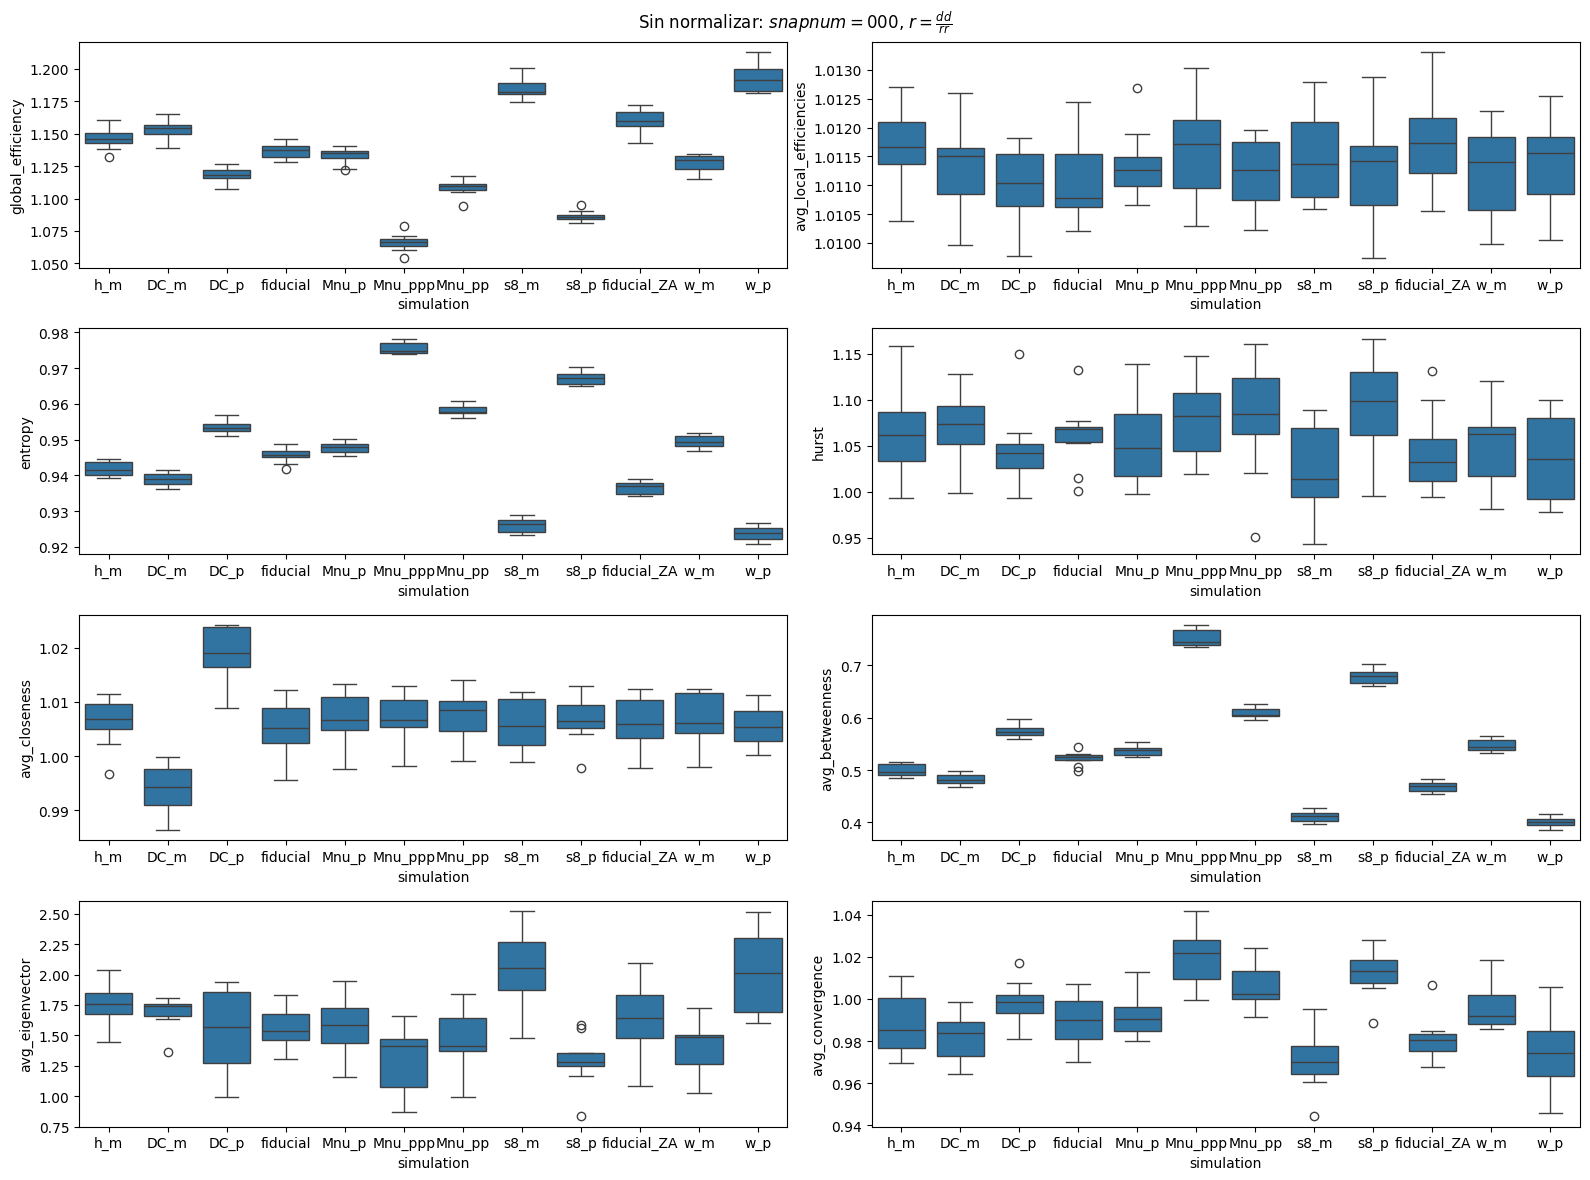

In [50]:
plot_ratio(df, "000", ratio_func1, r"Sin normalizar: $snapnum=000$, $r=\frac{dd}{rr}$")

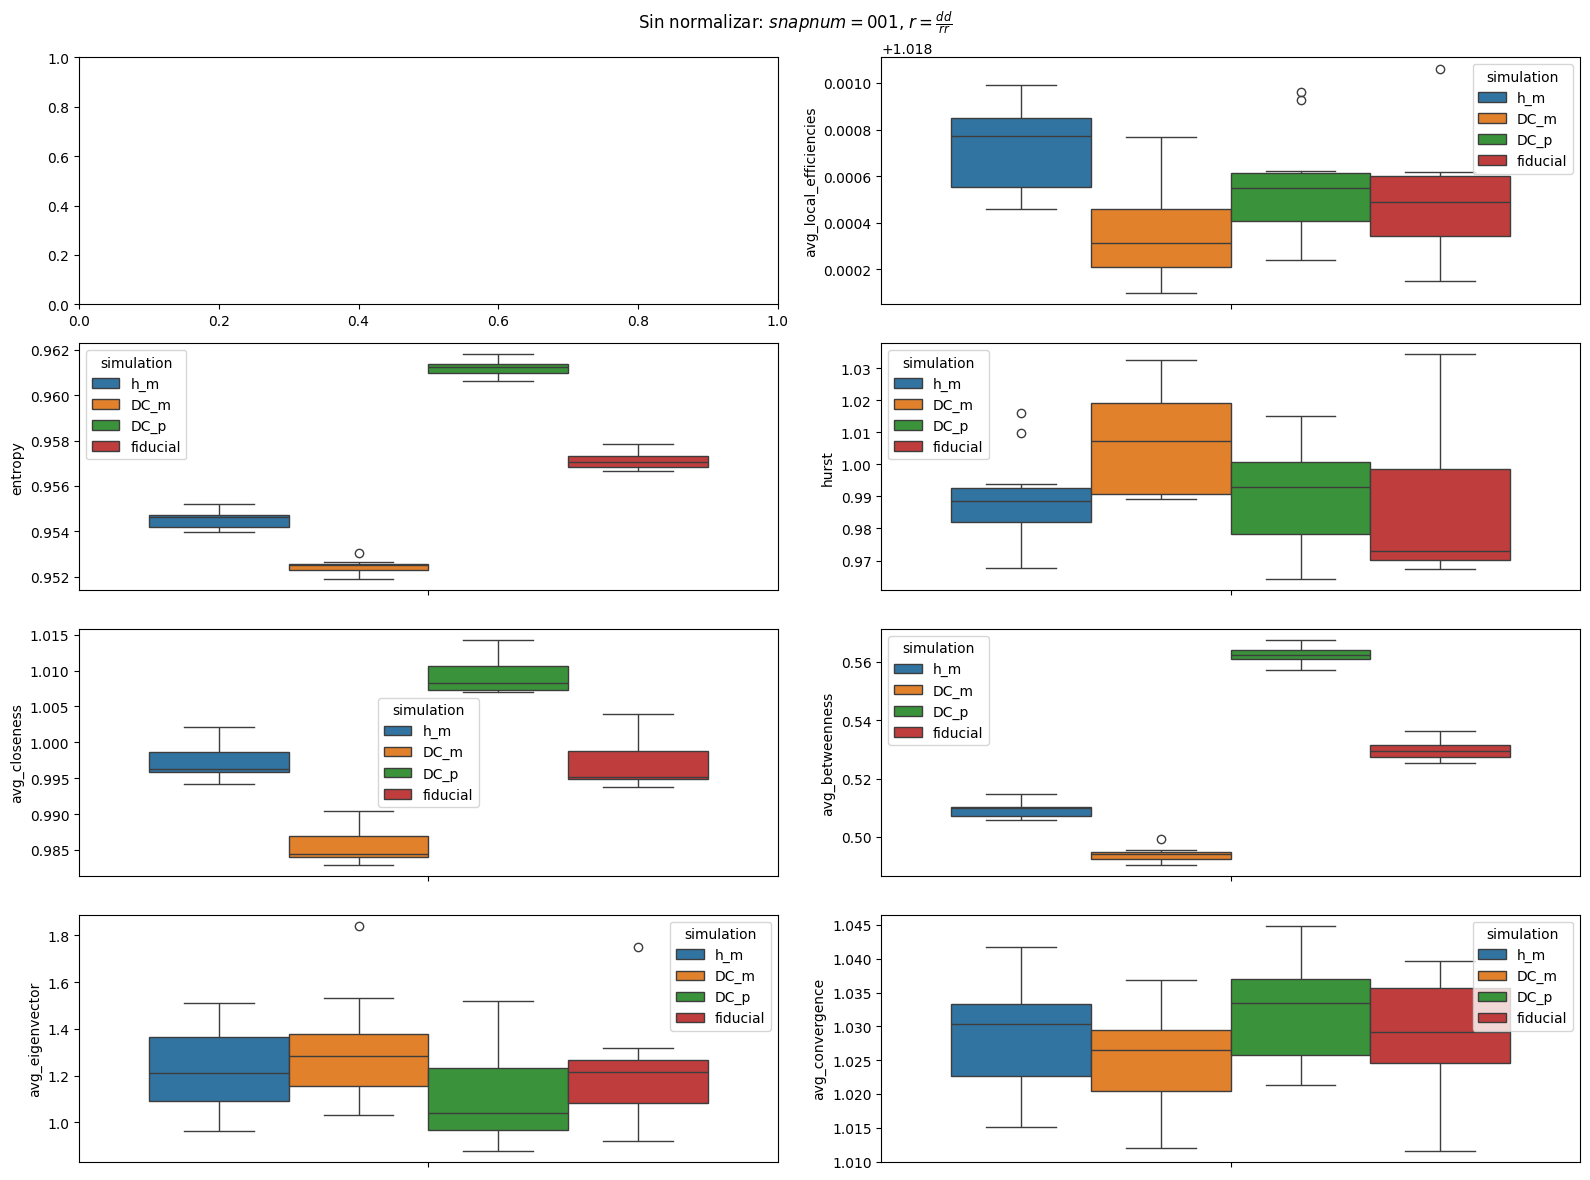

In [ ]:
plot_ratio(df, "001", ratio_func1, r"Sin normalizar: $snapnum=001$, $r=\frac{dd}{rr}$")

### Función del ratio: $r = \frac{dd - rr}{dd + rr}$

,simulation,realization,global_efficiency,avg_local_efficiencies,entropy,hurst,avg_closeness,avg_betweenness,avg_eigenvector,avg_convergence
0,h_m,101,0.071021,0.005471,-0.030088,0.016616,0.005686,-0.337327,0.276793,-0.002836
1,h_m,10,0.069412,0.005879,-0.030805,0.043862,0.004972,-0.341546,0.276509,-0.008822
2,h_m,1,0.066489,0.005622,-0.031353,0.008978,0.002550,-0.346753,0.182138,-0.015318
3,h_m,100,0.074218,0.005758,-0.031034,0.034772,0.003438,-0.342373,0.260745,0.002346
4,h_m,0,0.067854,0.005812,-0.030331,0.073213,0.001134,-0.336430,0.249701,-0.015258
...,...,...,...,...,...,...,...,...,...,...
115,w_p,106,0.091120,0.006210,-0.040305,-0.011235,0.004331,-0.434384,0.402252,-0.007539
116,w_p,1,0.087277,0.005902,-0.040647,-0.004195,0.001345,-0.434271,0.431437,-0.018719
117,w_p,104,0.090333,0.005000,-0.039162,0.046580,0.002255,-0.422352,0.328971,-0.008240
118,w_p,10,0.093420,0.005537,-0.041226,0.047571,0.005180,-0.443896,0.406341,-0.006463


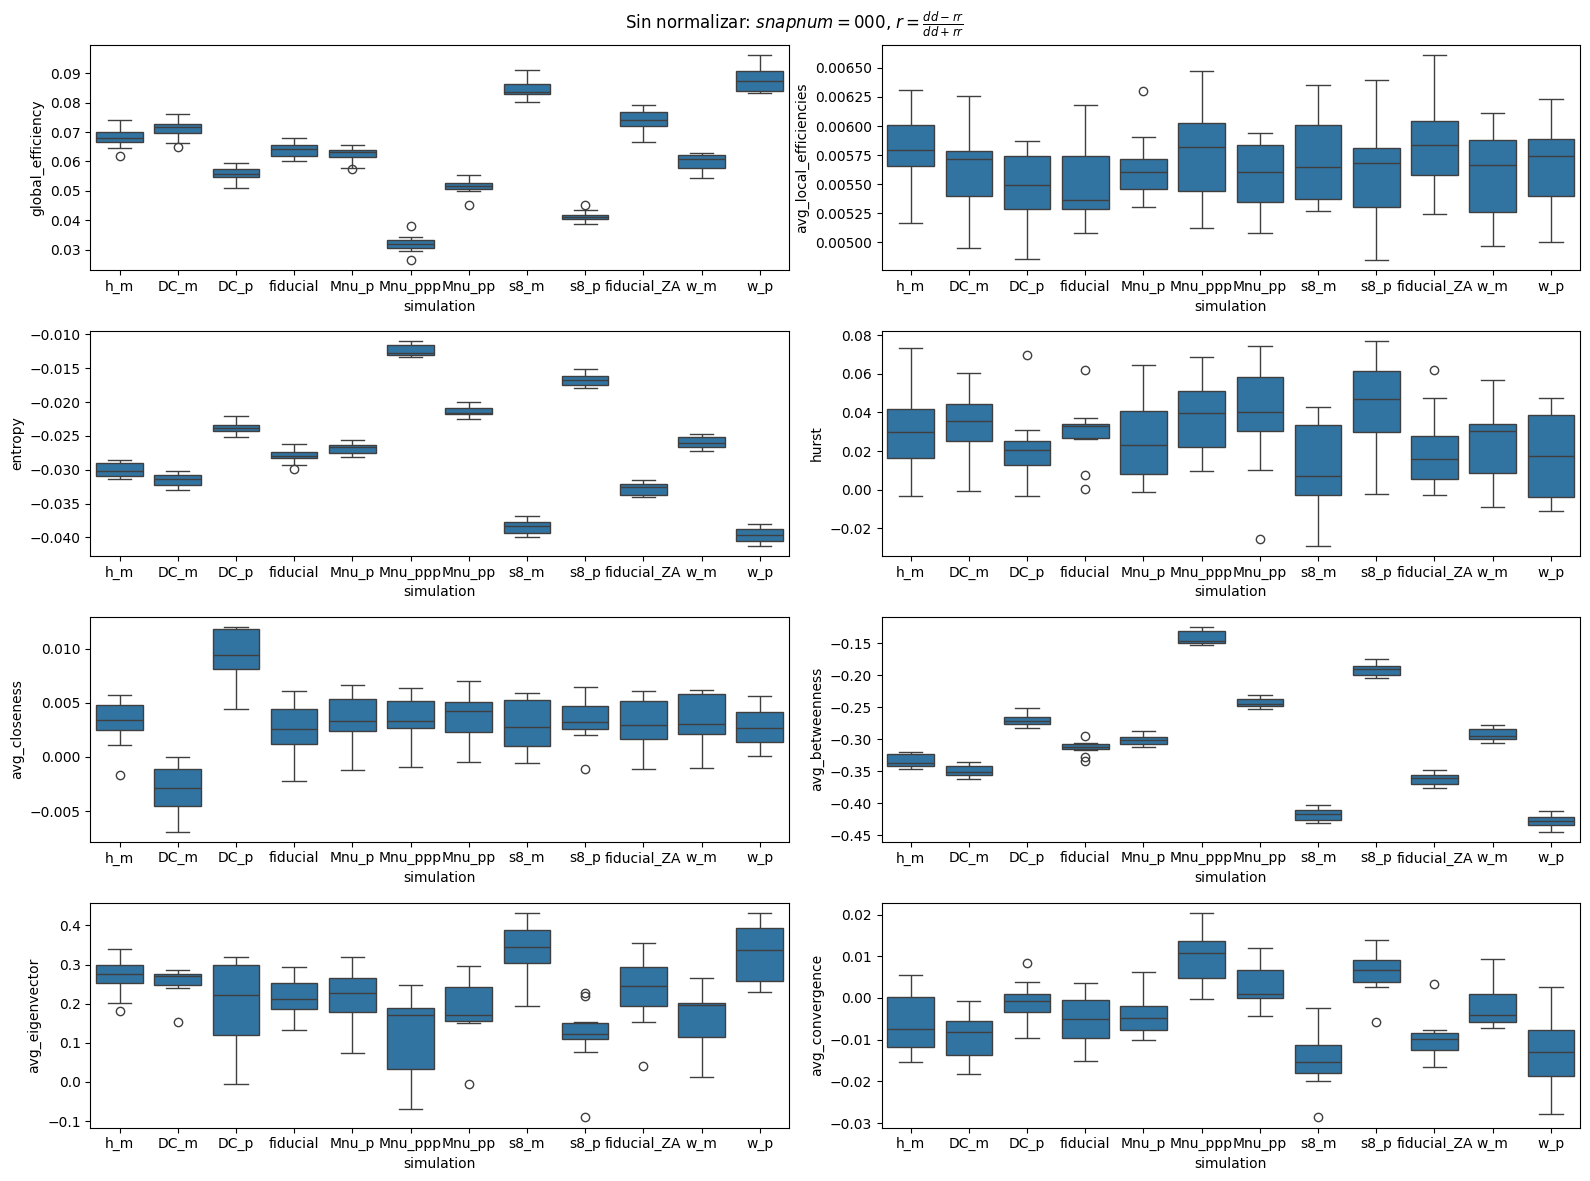

In [53]:
plot_ratio(df, "000", ratio_func2, r"Sin normalizar: $snapnum=000$, $r=\frac{dd - rr}{dd + rr}$")

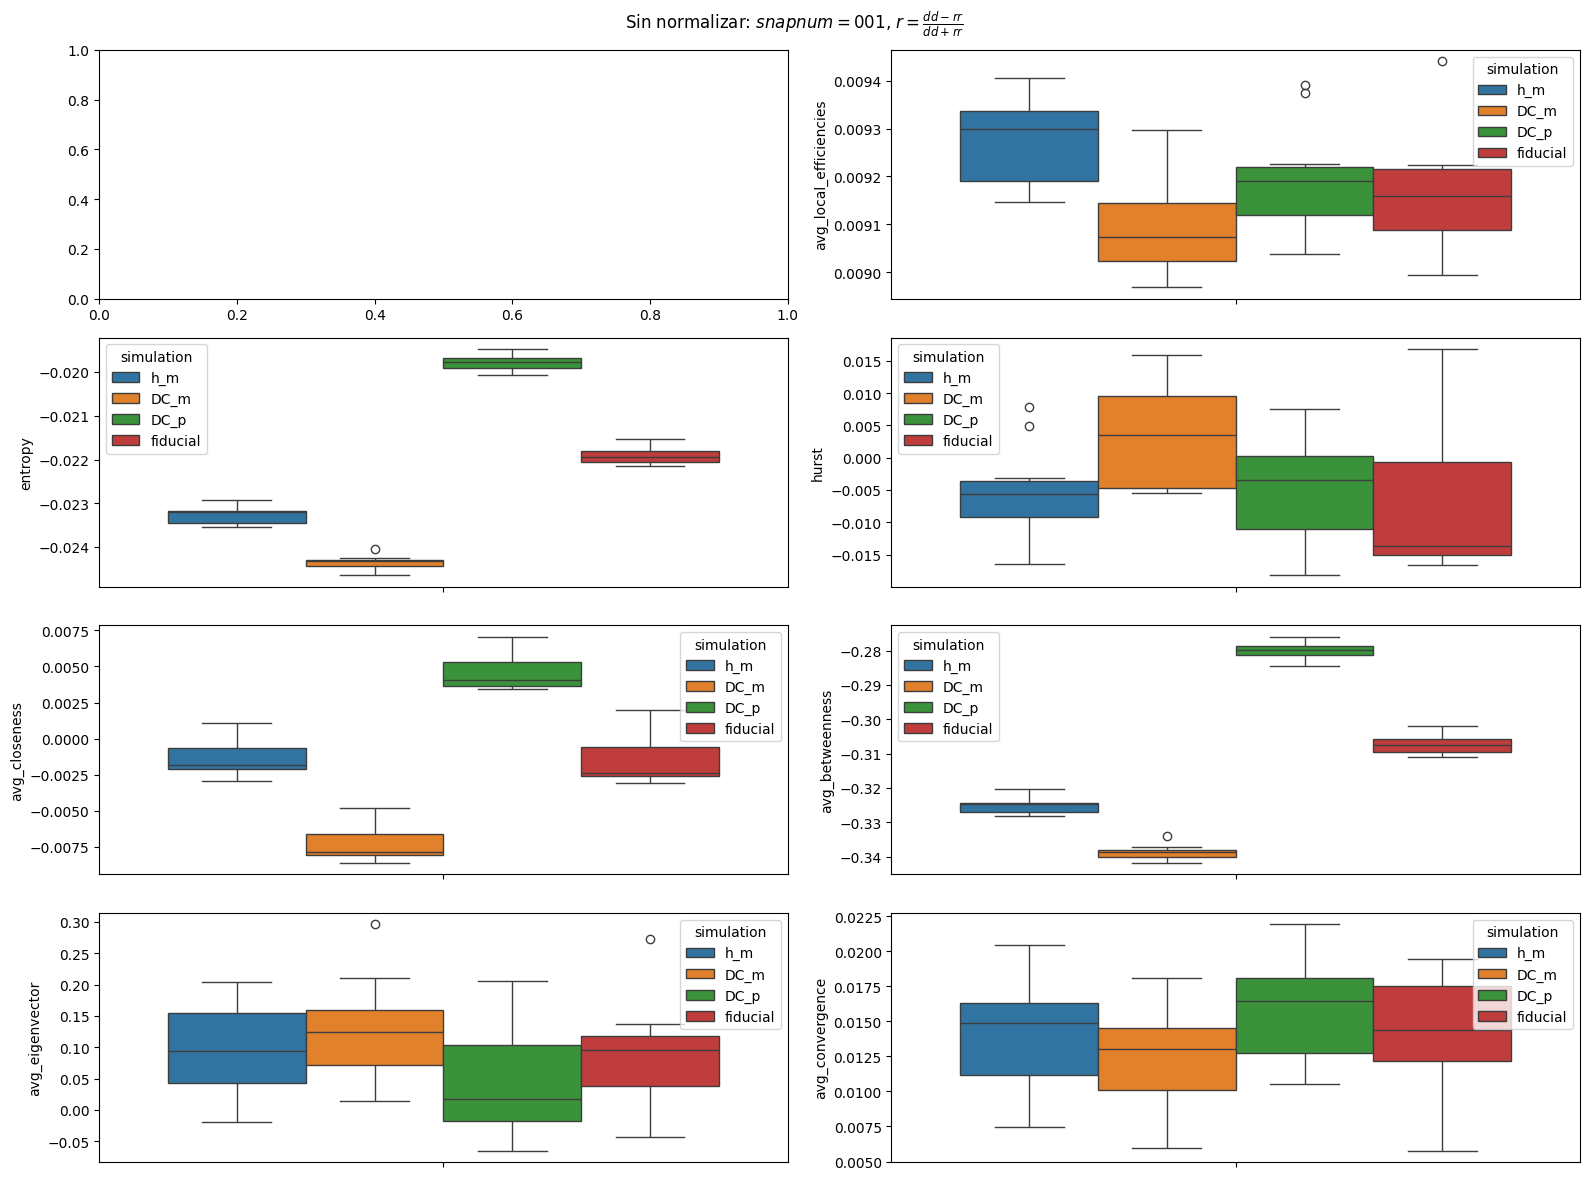

In [ ]:
plot_ratio(df, "001", ratio_func2, r"Sin normalizar: $snapnum=001$, $r=\frac{dd - rr}{dd + rr}$")

## Normalizados

### Función del ratio: $r = \frac{dd}{rr}$

,simulation,realization,global_efficiency,avg_local_efficiencies,entropy,hurst,avg_closeness,avg_betweenness,avg_eigenvector,avg_convergence
0,h_m,101,1.925493,1.688503,1.572562,1.726569,1.689230,0.827583,2.948547,1.660683
1,h_m,10,1.940671,1.708719,1.587810,1.843684,1.705624,0.828866,2.979581,1.659209
2,h_m,1,1.951476,1.727467,1.604297,1.739100,1.716886,0.828545,2.468963,1.656611
3,h_m,100,1.967951,1.715662,1.593918,1.818214,1.707718,0.830876,2.892435,1.703993
4,h_m,0,1.920197,1.695768,1.577484,1.940995,1.679977,0.832259,2.791833,1.625790
...,...,...,...,...,...,...,...,...,...,...
115,w_p,106,2.377481,2.005143,1.826938,1.936387,1.997622,0.780922,4.645788,1.950757
116,w_p,1,2.375255,2.017603,1.838162,1.977266,1.999297,0.786476,5.019983,1.920649
117,w_p,104,2.332663,1.965705,1.799461,2.136305,1.954942,0.790372,3.854334,1.914335
118,w_p,10,2.427595,2.035187,1.853390,2.213840,2.033737,0.775203,4.768142,1.986926


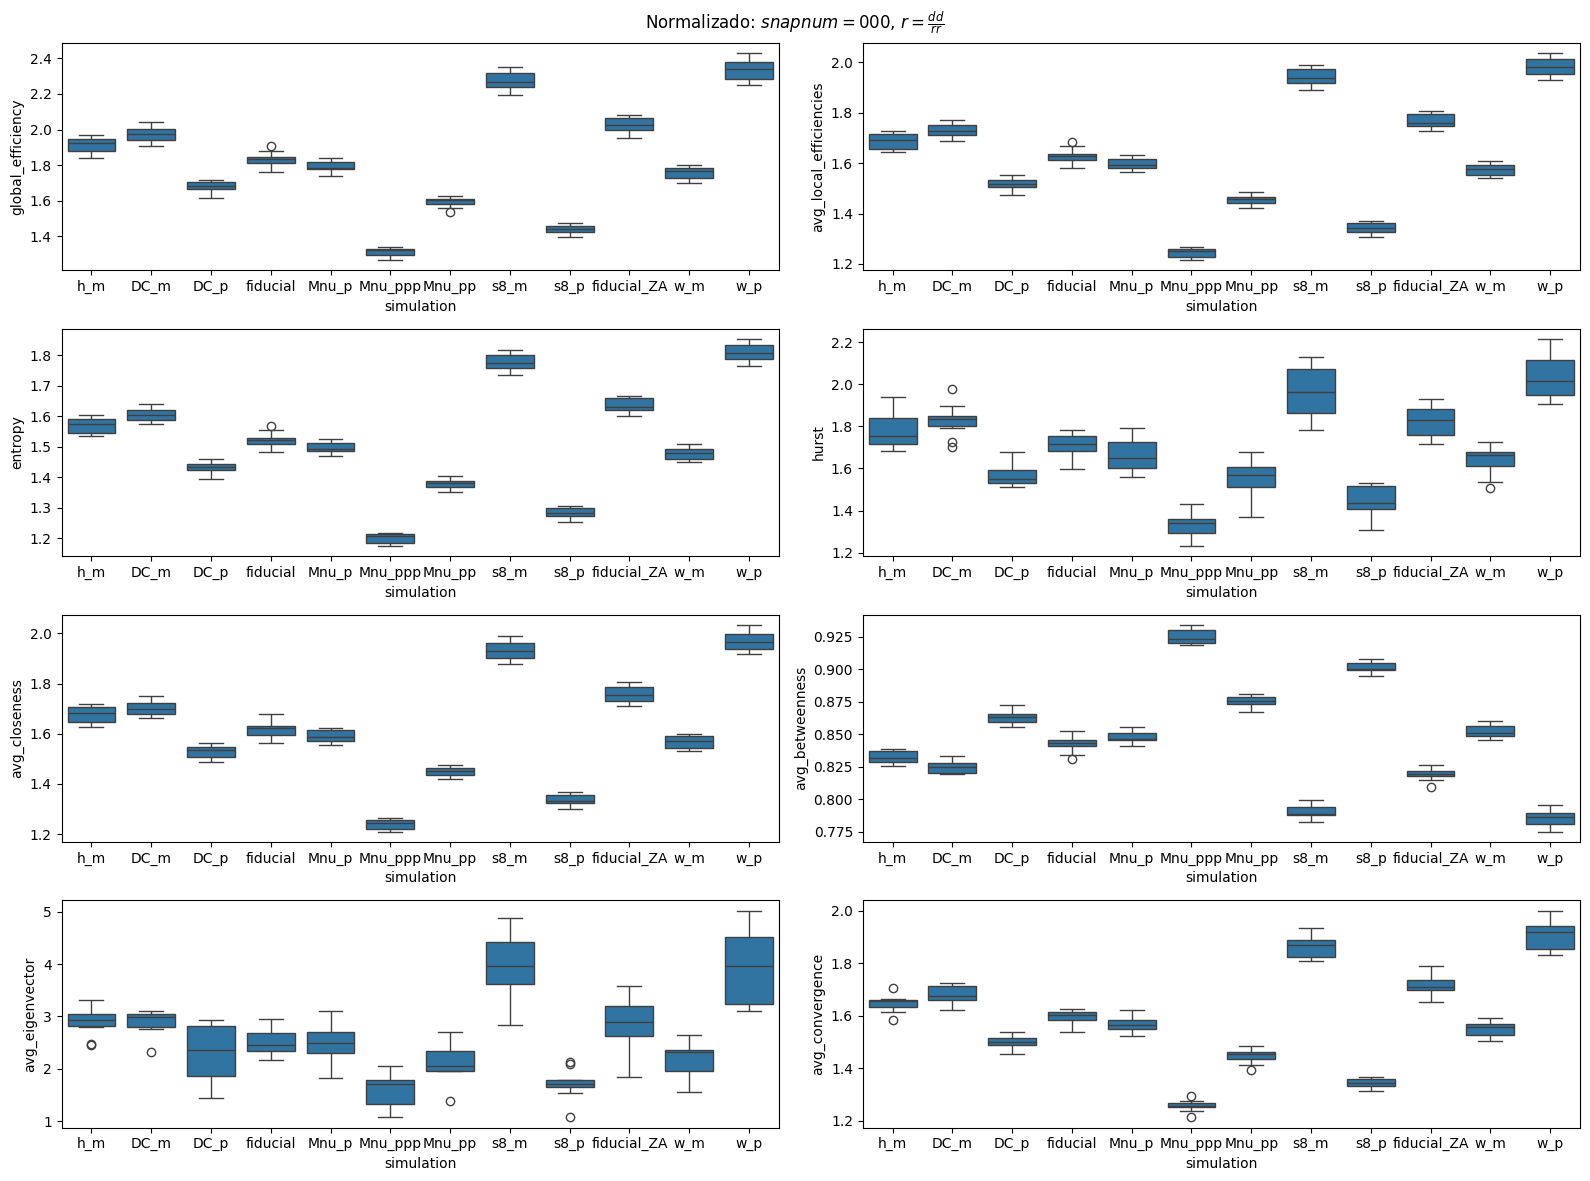

In [54]:
plot_ratio(normalized_df, "000", ratio_func1, r"Normalizado: $snapnum=000$, $r=\frac{dd}{rr}$")

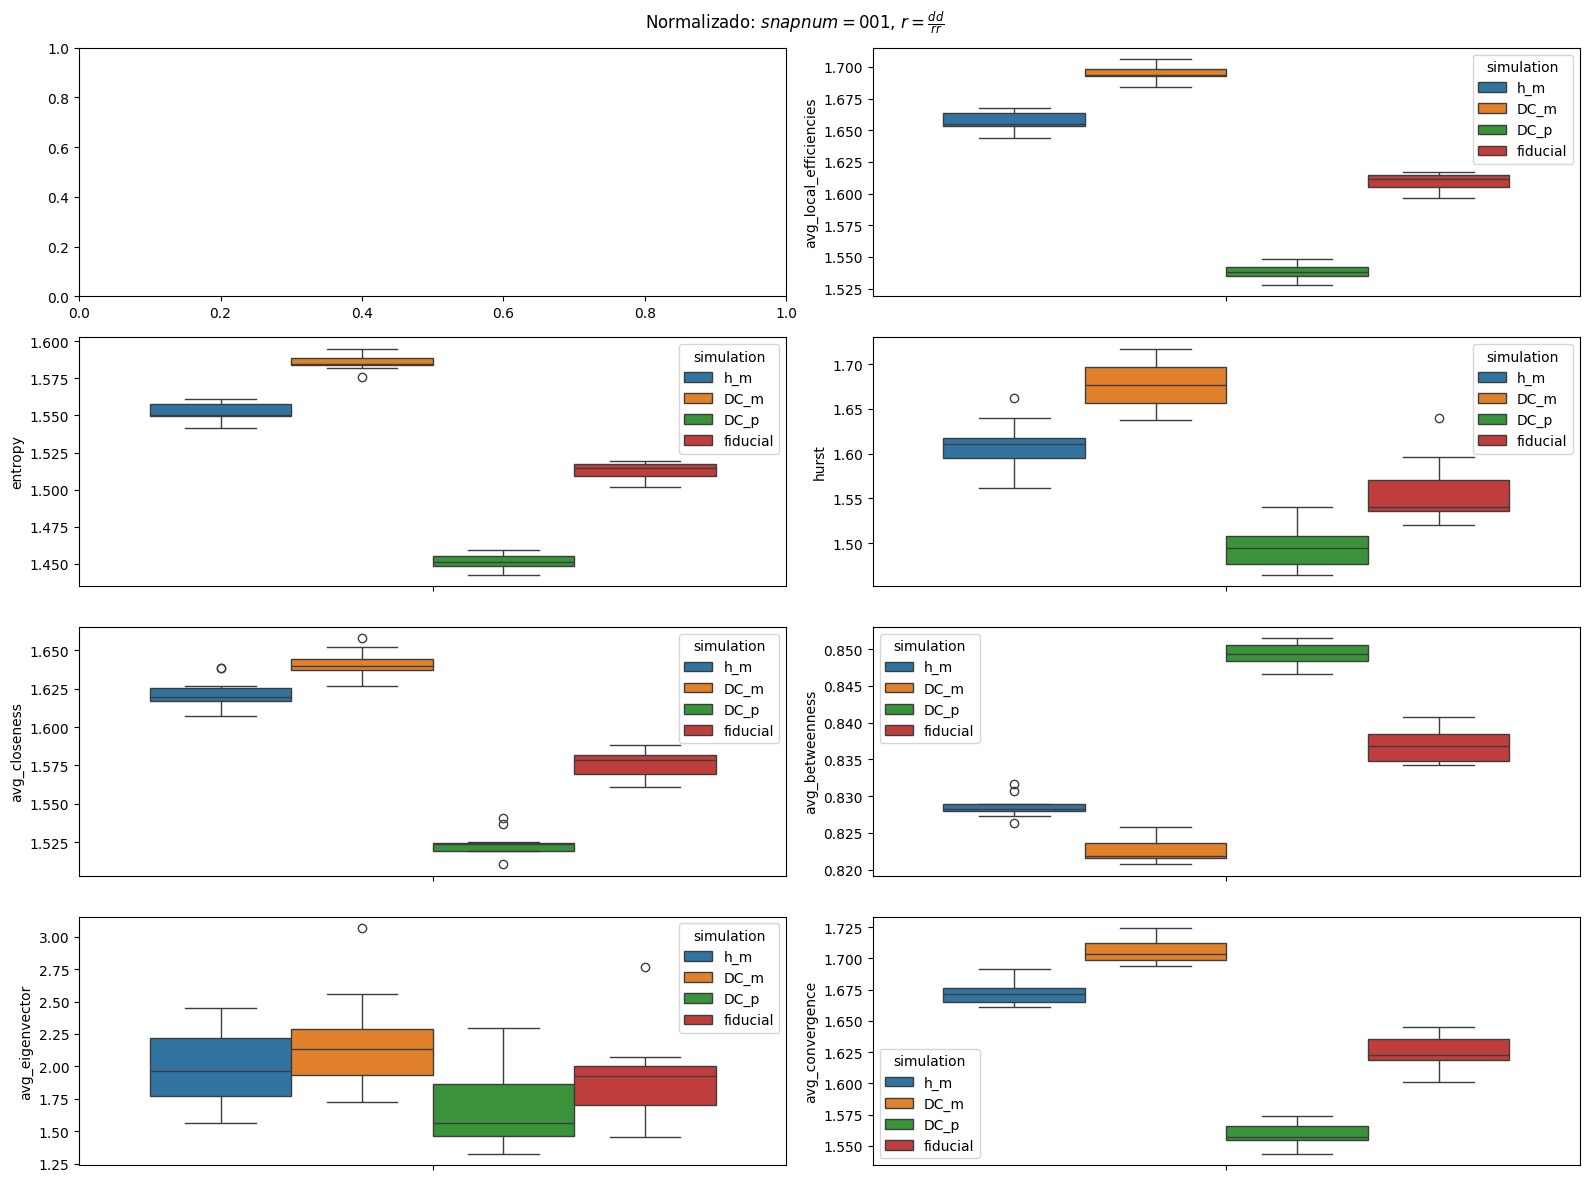

In [ ]:
plot_ratio(normalized_df, "001", ratio_func1, r"Normalizado: $snapnum=001$, $r=\frac{dd}{rr}$")

### Función del ratio: $r = \frac{dd - rr}{dd + rr}$

,simulation,realization,global_efficiency,avg_local_efficiencies,entropy,hurst,avg_closeness,avg_betweenness,avg_eigenvector,avg_convergence
0,h_m,101,0.316355,0.256092,0.222565,0.266477,0.256293,-0.094342,0.493485,0.248313
1,h_m,10,0.319883,0.261644,0.227146,0.296687,0.260799,-0.093574,0.497435,0.247897
2,h_m,1,0.322373,0.266719,0.232038,0.269833,0.263863,-0.093766,0.423459,0.247161
3,h_m,100,0.326135,0.263531,0.228966,0.290331,0.261371,-0.092373,0.486183,0.260353
4,h_m,0,0.315115,0.258096,0.224049,0.319958,0.253725,-0.091549,0.472551,0.238325
...,...,...,...,...,...,...,...,...,...,...
115,w_p,106,0.407843,0.334474,0.292521,0.318891,0.332804,-0.123014,0.645754,0.322208
116,w_p,1,0.407452,0.337222,0.295319,0.328243,0.333177,-0.119522,0.667773,0.315221
117,w_p,104,0.399879,0.325624,0.285577,0.362307,0.323168,-0.117086,0.587997,0.313737
118,w_p,10,0.416501,0.341062,0.299079,0.377691,0.340747,-0.126632,0.653268,0.330415


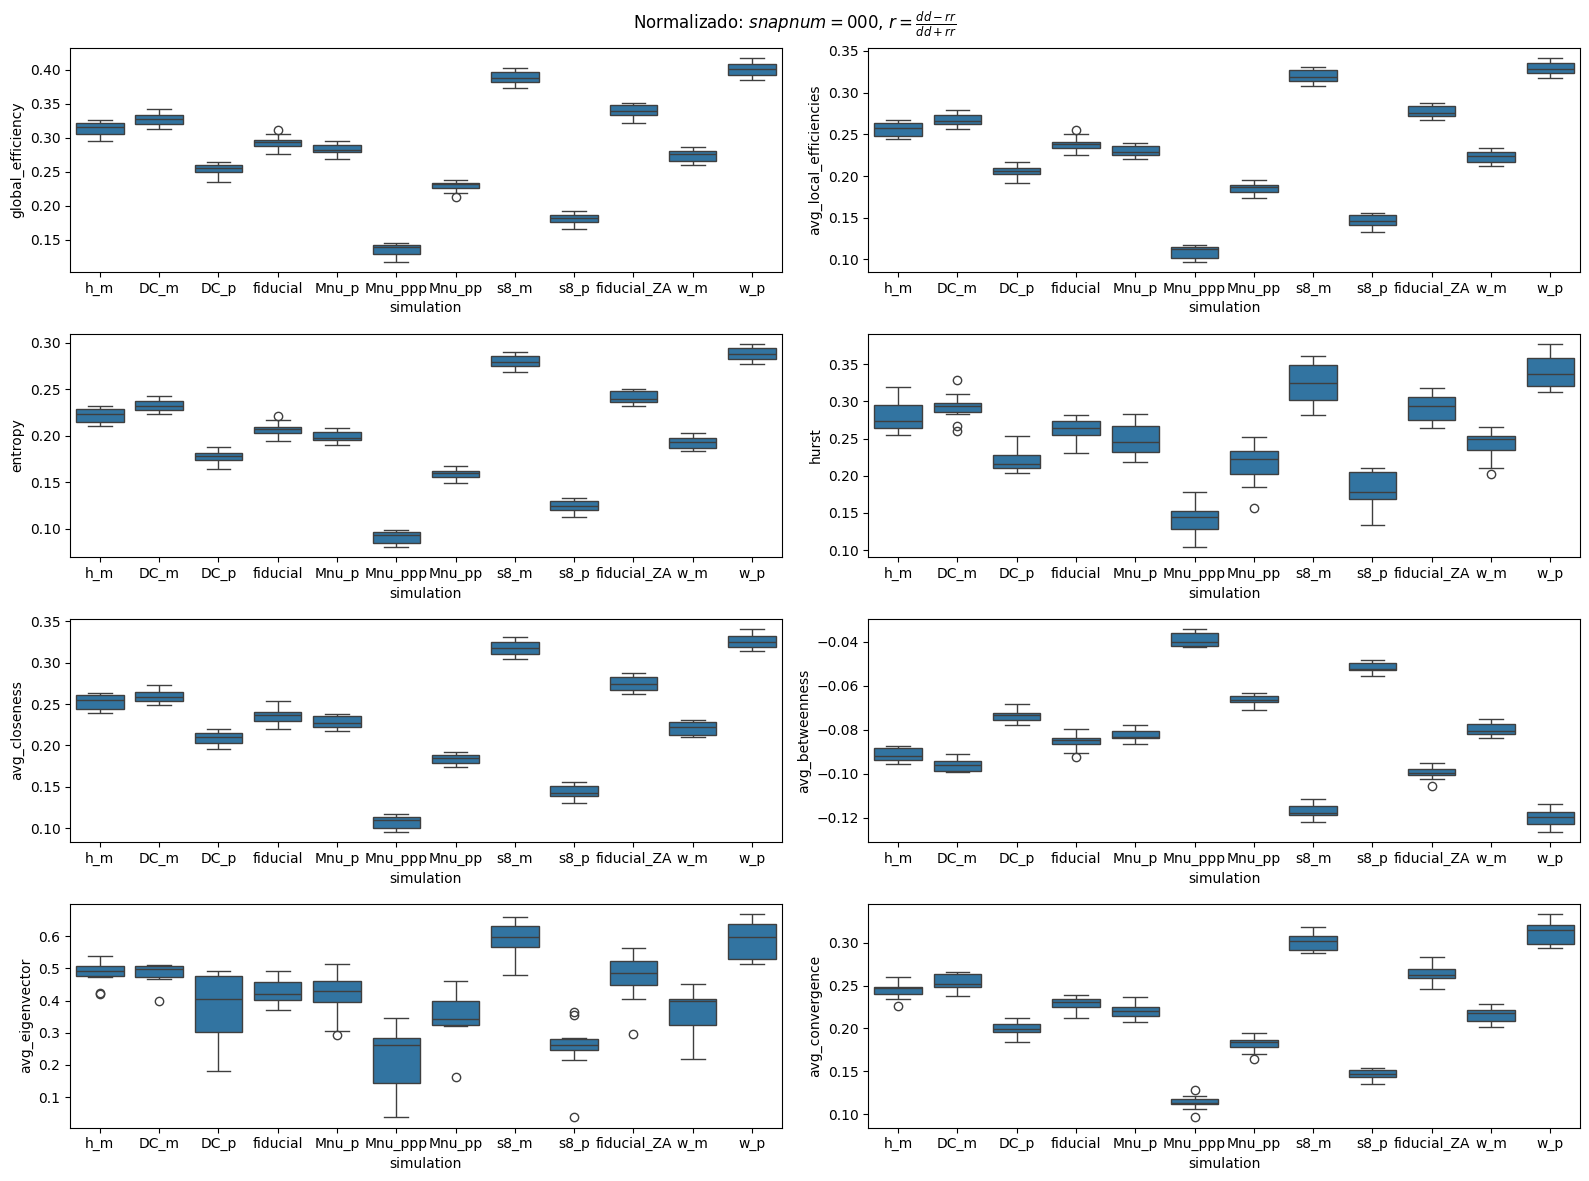

In [55]:
plot_ratio(normalized_df, "000", ratio_func2, r"Normalizado: $snapnum=000$, $r=\frac{dd - rr}{dd + rr}$")

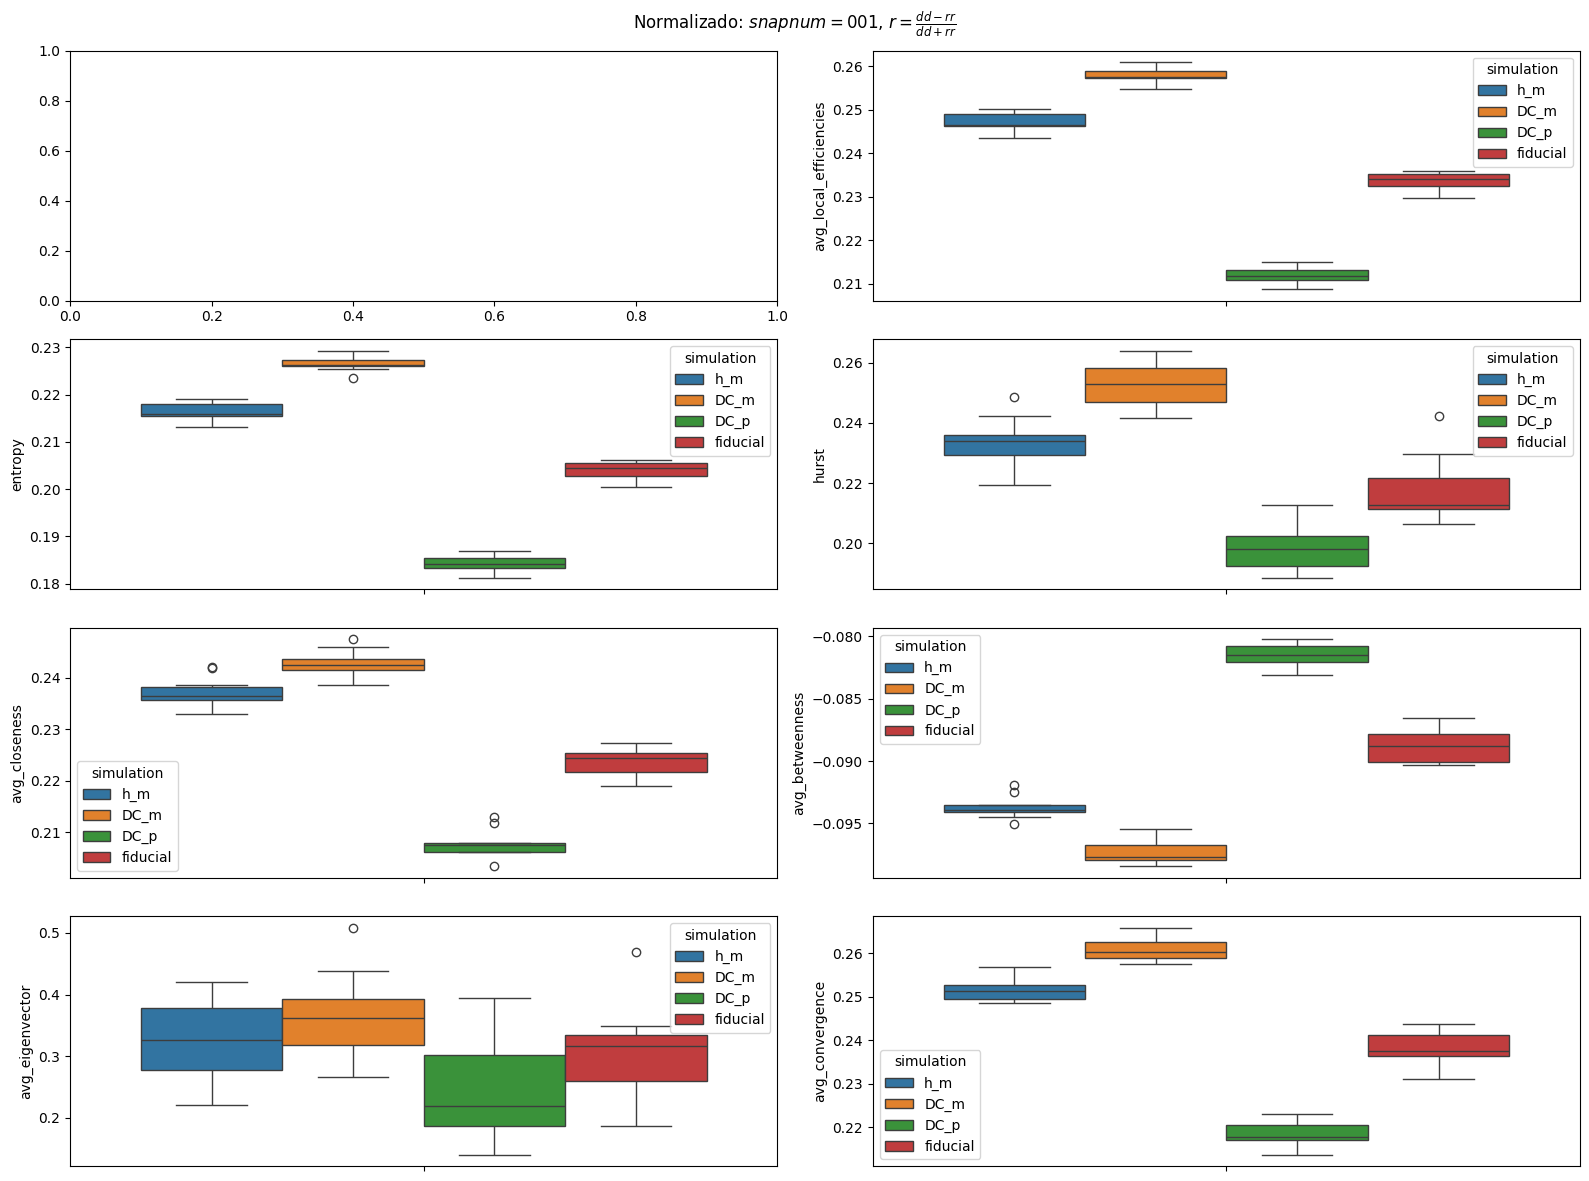

In [25]:
plot_ratio(normalized_df, "001", ratio_func2, r"Normalizado: $snapnum=001$, $r=\frac{dd - rr}{dd + rr}$")